# Stock Market Analysis Project - COVID 19 Edition 
Due to the global pandemic, there was a surge for work from home (WFH) and online classes. Two companies that weren't popular years ago became household name. They also declared IPO in 2020. 
The companies are Zoom (NASDAQ: ZM) and Asana (NYSE: ASAN).

I will be analysing Stock data from Oct 2020 to Dec 2020. 

This project will showcase my skills in matplotlib, pandas, and numpy. 

Please don't infer financial trading advice from this analysis. 

$ pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
$ pip install matplotlib.pyplot inline

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#retriving stock data
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2020, 10, 1)
end = datetime.datetime(2020, 12, 31)
zoom = web.DataReader("ZM", 'yahoo', start, end)
asana = web.DataReader("ASAN", 'yahoo', start, end)

In [5]:
asana.head() #to check if the data retrived are consistent 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-01,27.440001,25.799999,27.260000,26.129999,12996100,26.129999
2020-10-02,26.000000,24.940001,24.940001,25.910000,3490800,25.910000
2020-10-05,25.840000,25.000000,25.719999,25.190001,2150400,25.190001
2020-10-06,26.690001,24.700001,25.110001,26.000000,6900800,26.000000
2020-10-07,26.570000,25.010000,25.750000,26.480000,3760900,26.480000


###### Data Visualization

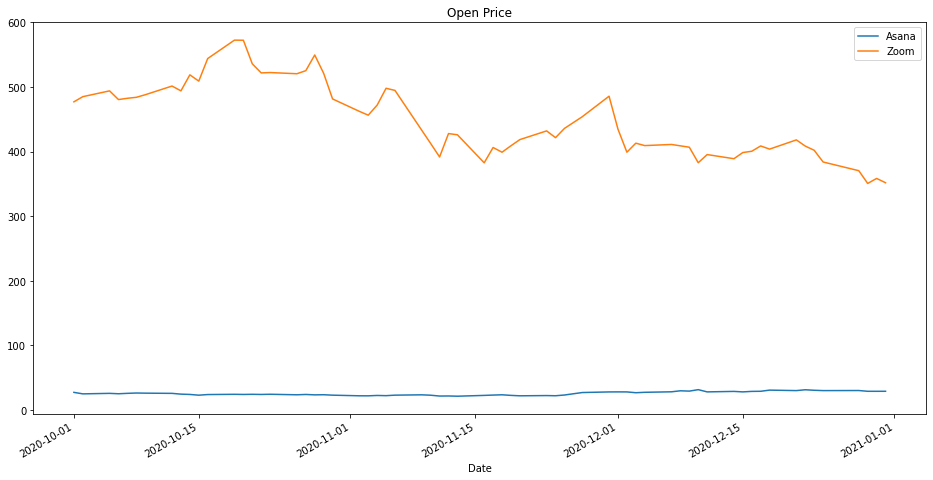

In [6]:
#opening price 
asana['Open'].plot(label='Asana',figsize=(16,8),title='Open Price')
zoom['Open'].plot(label='Zoom')
plt.legend();

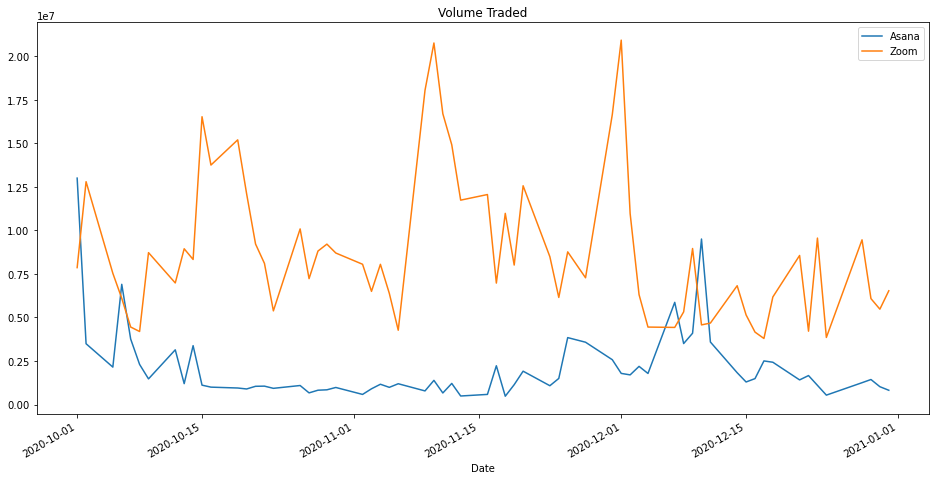

In [7]:
#volume
asana['Volume'].plot(label='Asana',figsize=(16,8),title='Volume Traded')
zoom['Volume'].plot(label='Zoom')
plt.legend();

In [8]:
#total traded 
asana['Total Traded'] = asana['Open']*asana['Volume']
zoom['Total Traded'] = zoom['Open']*zoom['Volume']

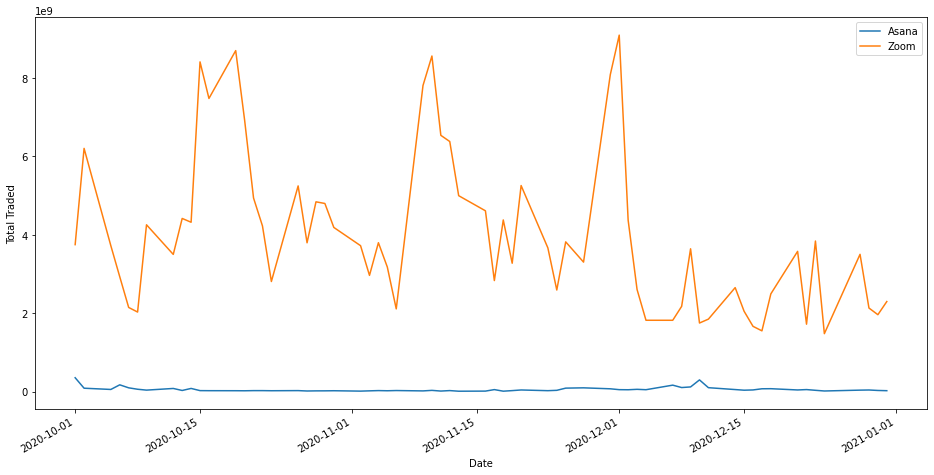

In [9]:
asana['Total Traded'].plot(label='Asana',figsize=(16,8))
zoom['Total Traded'].plot(label='Zoom')
plt.legend();
plt.ylabel('Total Traded');

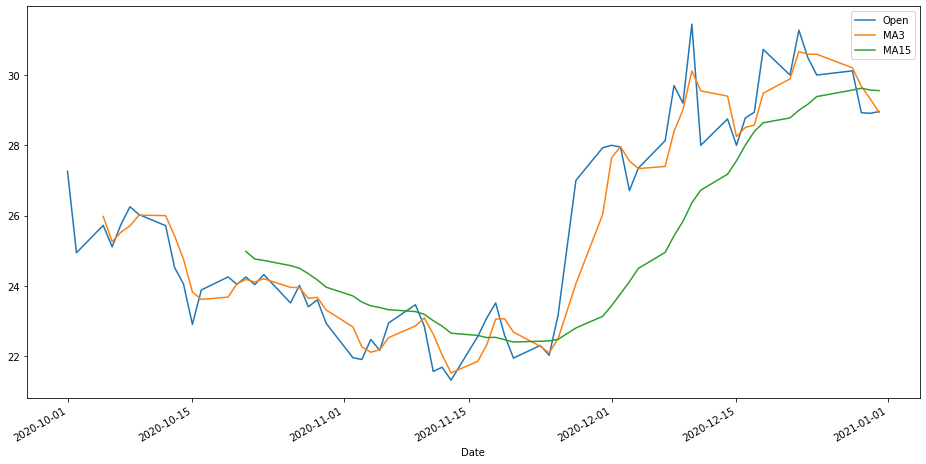

In [10]:
#moving averages for Asana
asana['MA3'] = asana['Open'].rolling(3).mean()
asana['MA15'] = asana['Open'].rolling(15).mean()
asana[['Open','MA3','MA15']].plot(label='Asana',figsize=(16,8));

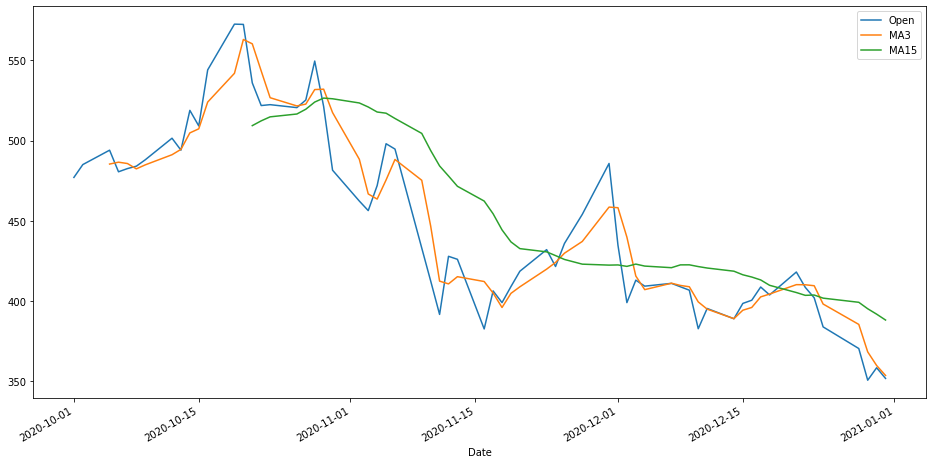

In [11]:
#moving averages for Zoom
zoom['MA3'] = zoom['Open'].rolling(3).mean()
zoom['MA15'] = zoom['Open'].rolling(15).mean()
zoom[['Open','MA3','MA15']].plot(label='Zoom',figsize=(16,8));

### Relationship visualization 
resource: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot 

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
stock_comp = pd.concat([asana['Open'],zoom['Open']],axis=1)

In [14]:
stock_comp.columns = ['Asana Open','Zoom Open']

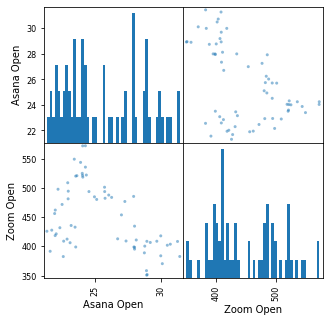

In [15]:
scatter_matrix(stock_comp,figsize=(5,5),alpha=0.5,hist_kwds={'bins':50});

C:\Users\sum36\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


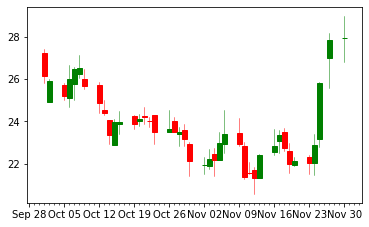

In [16]:
#Candlestick Visualization for Asana
#Similarly, it can be implemented for Zoom. 
#Less data points will make chart look more readable 
#resource: https://matplotlib.org/examples/pylab_examples/finance_demo.html

from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
asana_reset = asana.loc['2020-10':'2020-11'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
asana_reset['date_ax'] = asana_reset['Date'].apply(lambda date: date2num(date))
asana_values = [tuple(vals) for vals in asana_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, asana_values, width=0.9, colorup='g',colordown='r');

### Basic Financial Analysis 

In [17]:
#daily percentage change 
asana['returns'] = asana['Close'].pct_change(1)
zoom['returns'] = zoom['Close'].pct_change(1)

In [18]:
asana.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA3,MA15,returns
Date,,,,,,,,,,
2020-10-01,27.440001,25.799999,27.260000,26.129999,12996100,26.129999,3.542737e+08,NaN,NaN,NaN
2020-10-02,26.000000,24.940001,24.940001,25.910000,3490800,25.910000,8.706055e+07,NaN,NaN,-0.008419
2020-10-05,25.840000,25.000000,25.719999,25.190001,2150400,25.190001,5.530829e+07,25.973333,NaN,-0.027788
2020-10-06,26.690001,24.700001,25.110001,26.000000,6900800,26.000000,1.732791e+08,25.256667,NaN,0.032156
2020-10-07,26.570000,25.010000,25.750000,26.480000,3760900,26.480000,9.684318e+07,25.526667,NaN,0.018462


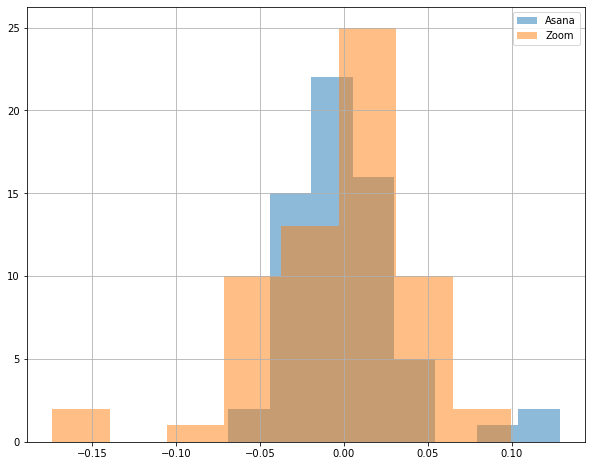

In [19]:
asana['returns'].hist(bins=8,label='Asana',figsize=(10,8),alpha=0.5)
zoom['returns'].hist(bins=8,label='Zoom',alpha=0.5)
plt.legend();

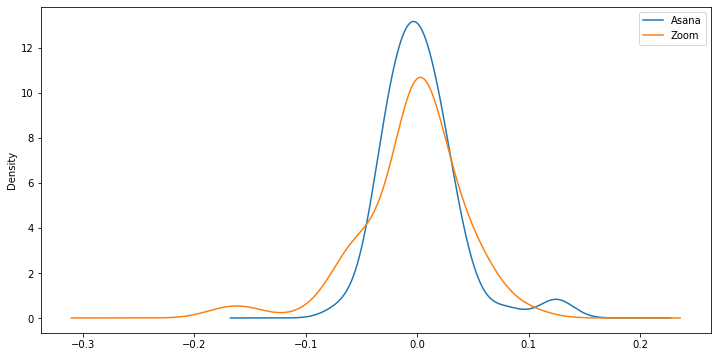

In [20]:
#KDE
asana['returns'].plot(kind='kde',label='Asana',figsize=(12,6))
zoom['returns'].plot(kind='kde',label='Zoom')
plt.legend();

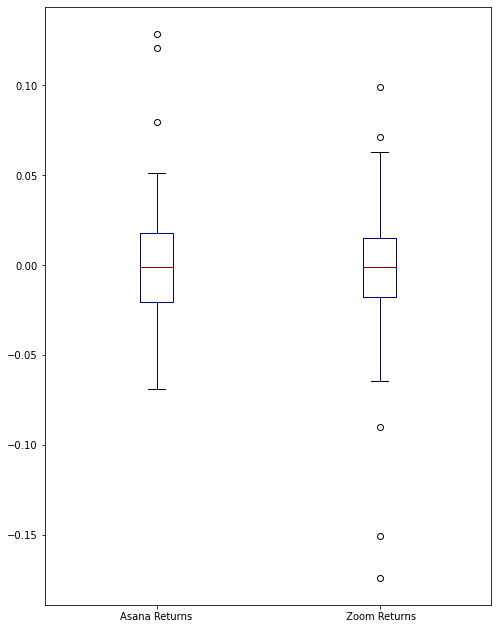

In [21]:
#box plot 
box_df = pd.concat([asana['returns'],zoom['returns']],axis=1)
box_df.columns = ['Asana Returns',' Zoom Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

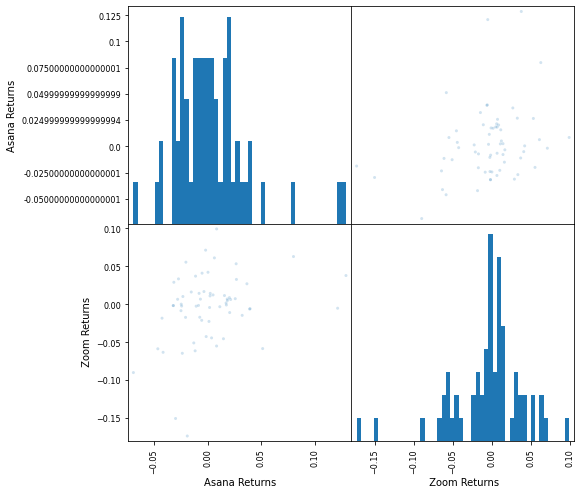

In [22]:
#comparing return between stocks

scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [23]:
#cummulative daily return 

asana['Cumulative Return'] = (1 + asana['returns']).cumprod()
zoom['Cumulative Return'] = (1 + zoom['returns']).cumprod()

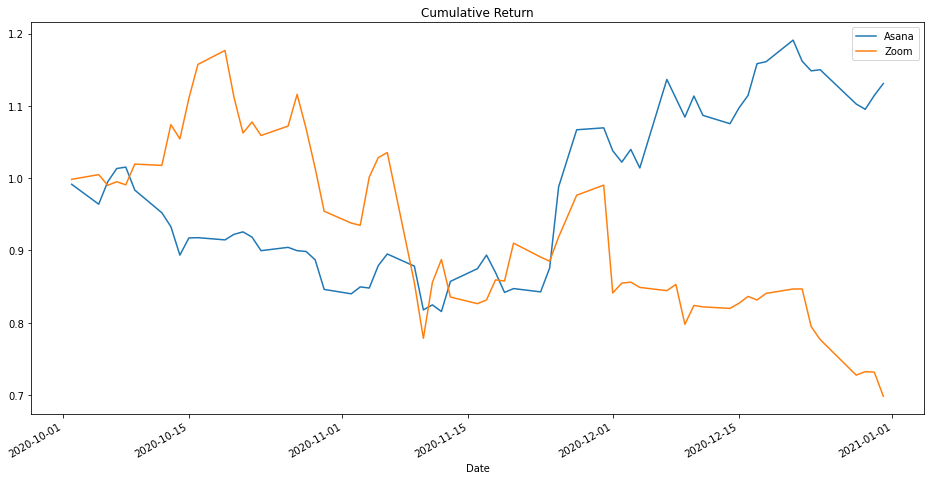

In [24]:
asana['Cumulative Return'].plot(label='Asana',figsize=(16,8),title='Cumulative Return')
zoom['Cumulative Return'].plot(label='Zoom')
plt.legend();